# Lag correlation in time series

In [1]:
from utilities.std_imports import *
import scipy.stats as stats
import time_series.visualization.ts_plots as tsp

### Load data

In [2]:
ds = pd.read_csv(csv_path + 'time_series/multivariate.csv')
ds.head()

,obs,r1,r2
0,76.53,8320,7771
1,76.53,8117,7774
2,76.15,7620,7788
3,75.39,6413,7787
4,75.51,7518,7767


### Correlation analysis

Pearson r= -0.03  p-value= 0.46


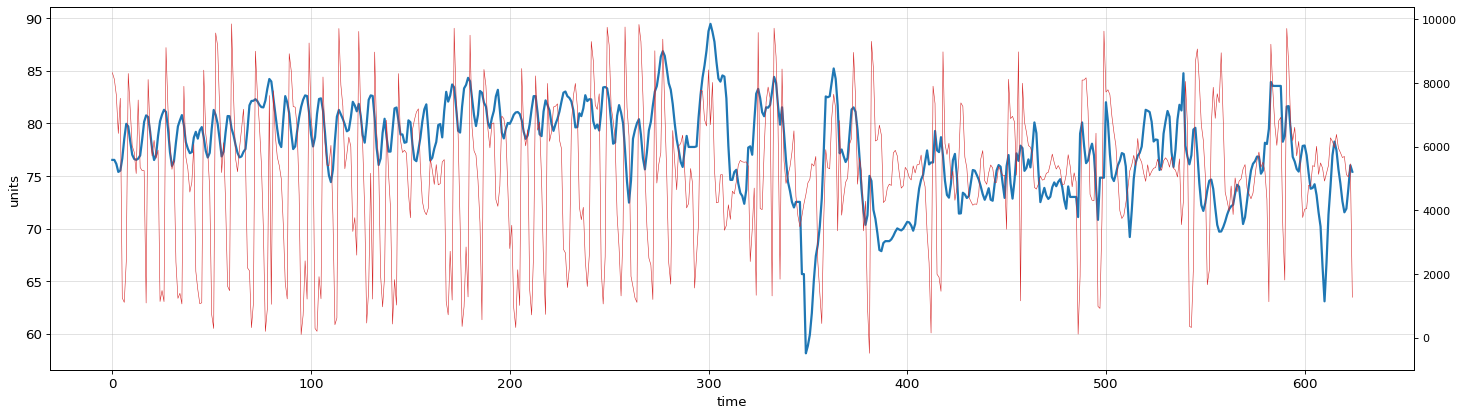

Pearson r= -0.21  p-value= 0.0


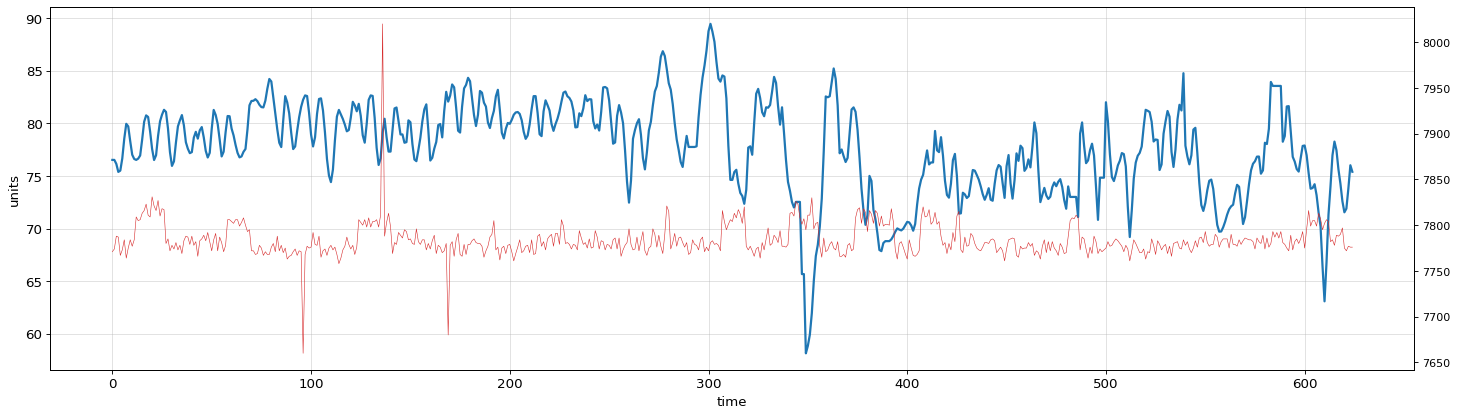

In [3]:
for c in range(1, ds.shape[1]):
    ts1 = ds.iloc[:, 0]
    ts2 = ds.iloc[:, c]
    r, p = stats.pearsonr(ts1, ts2)
    print('Pearson r=', round(r,2), ' p-value=', round(p,2))
    tsp.plot_compare(ts1, ts2)    
    plt.show()

### Lagged correlation

obs / r1  lag= 1
Pearson r= 0.07  p-value= 0.08


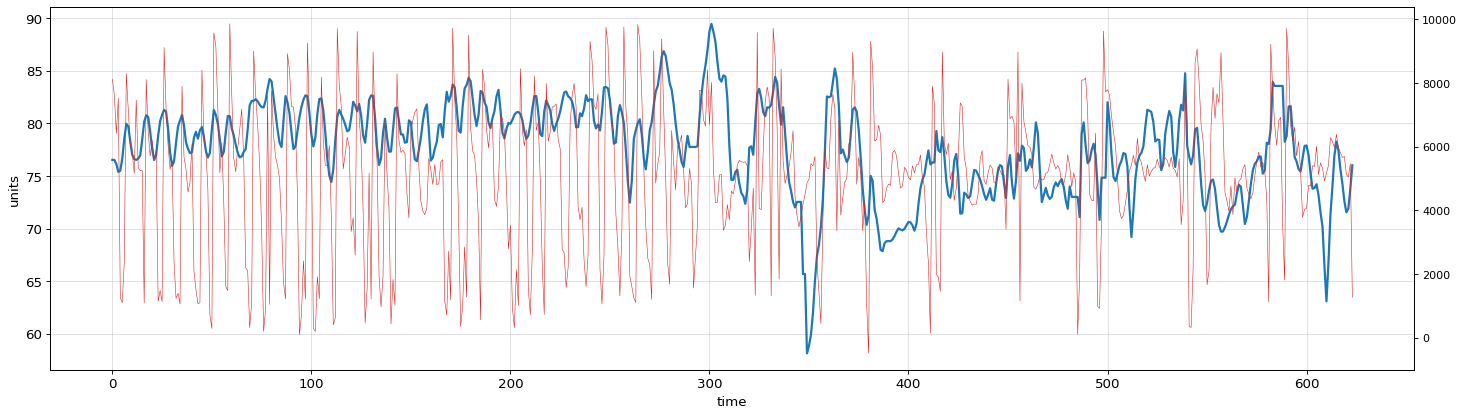

obs / r1  lag= 2
Pearson r= 0.11  p-value= 0.0


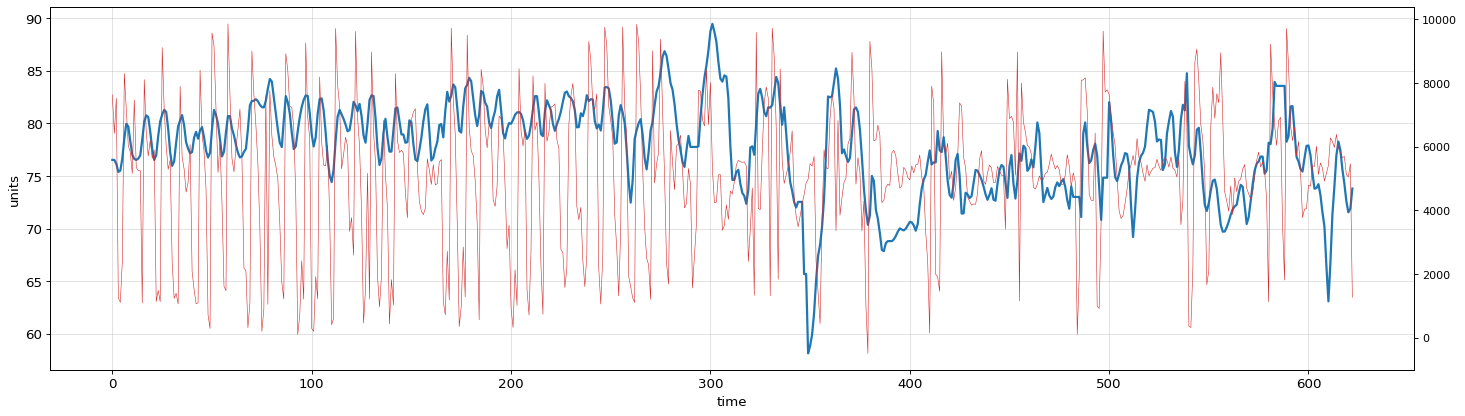

obs / r1  lag= 3
Pearson r= 0.11  p-value= 0.01


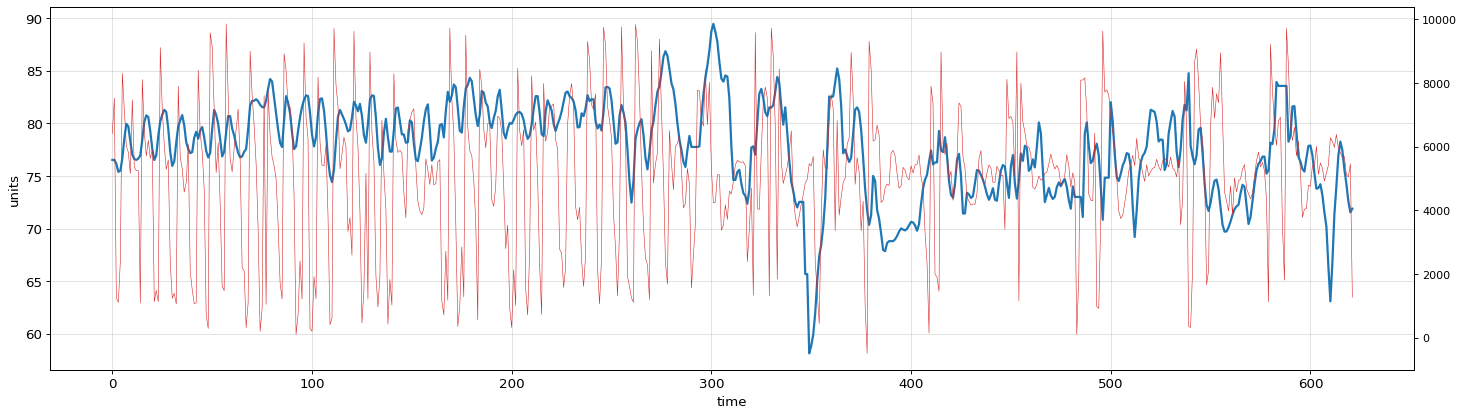

obs / r1  lag= 4
Pearson r= 0.05  p-value= 0.19


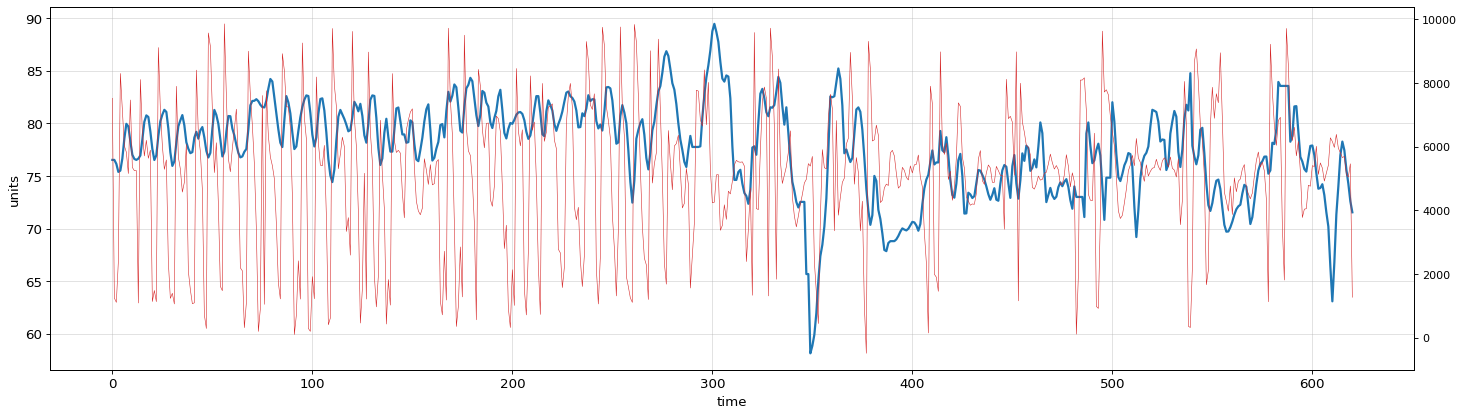

obs / r1  lag= 5
Pearson r= -0.03  p-value= 0.47


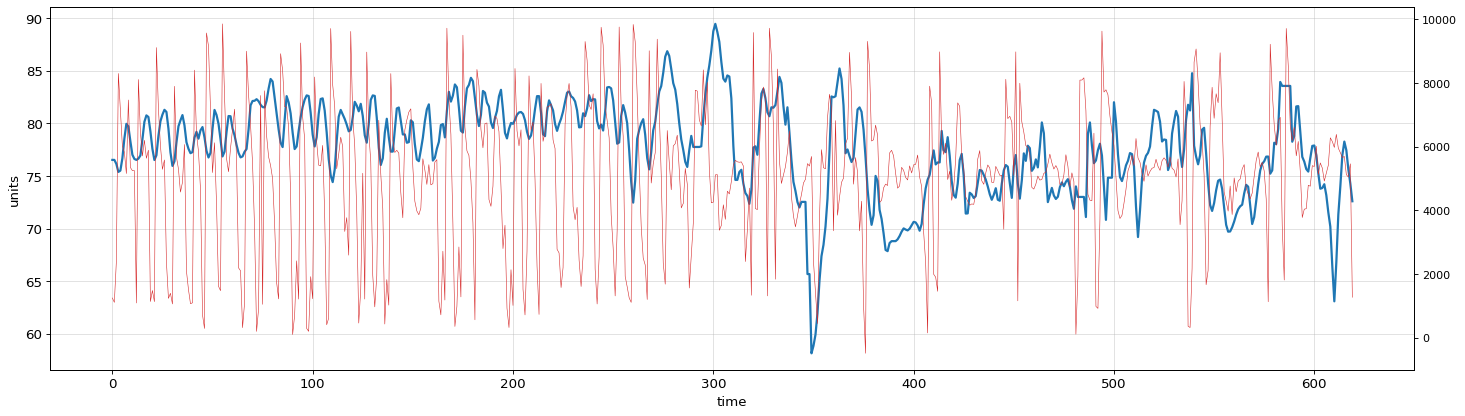

obs / r2  lag= 1
Pearson r= -0.19  p-value= 0.0


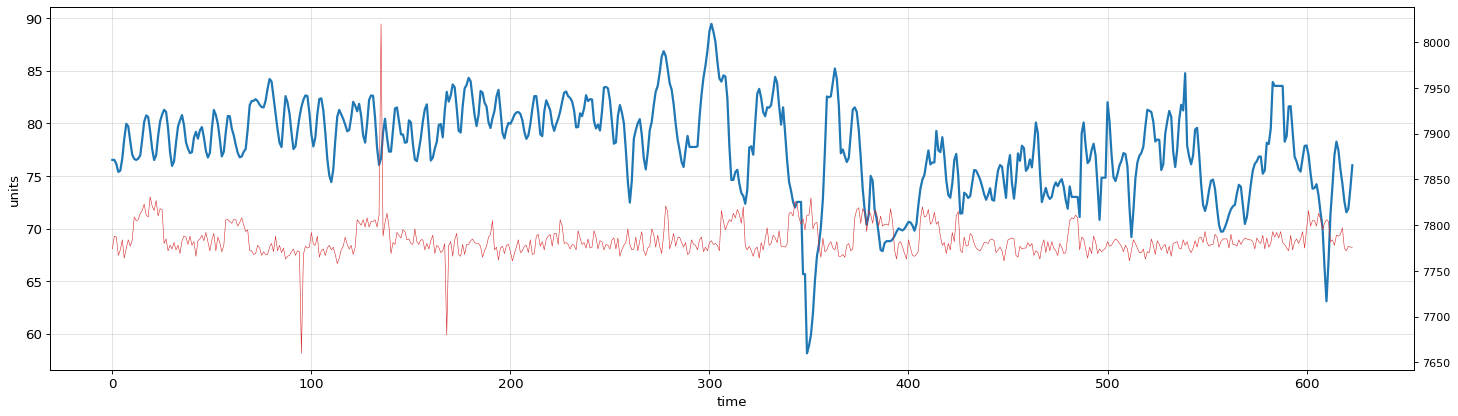

obs / r2  lag= 2
Pearson r= -0.16  p-value= 0.0


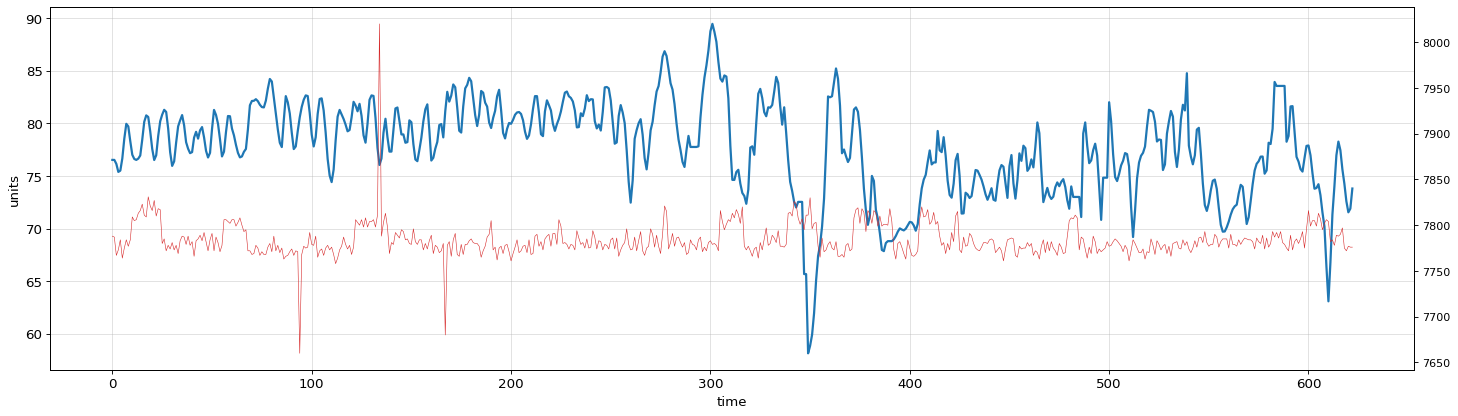

obs / r2  lag= 3
Pearson r= -0.11  p-value= 0.0


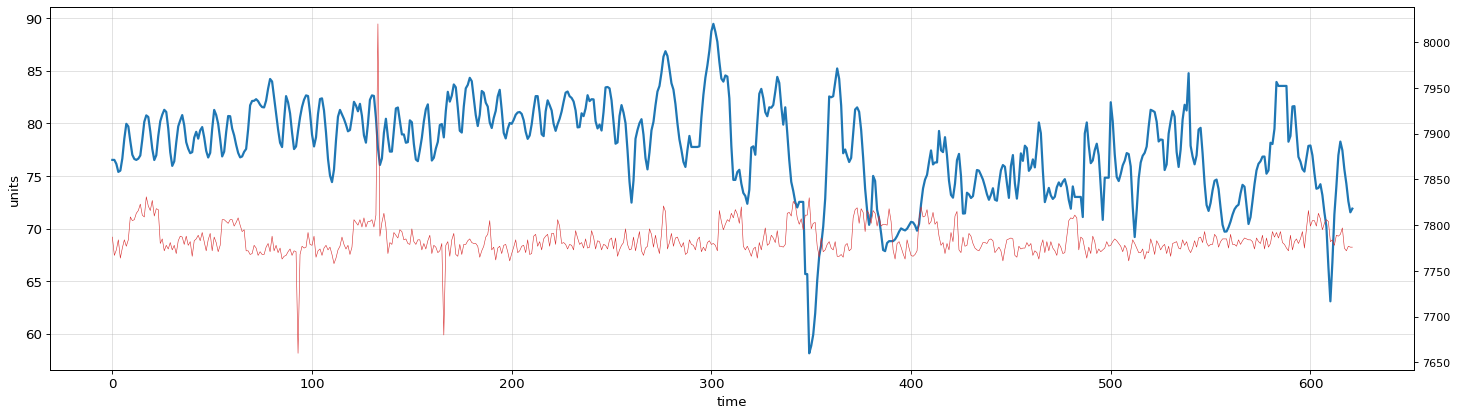

obs / r2  lag= 4
Pearson r= -0.07  p-value= 0.08


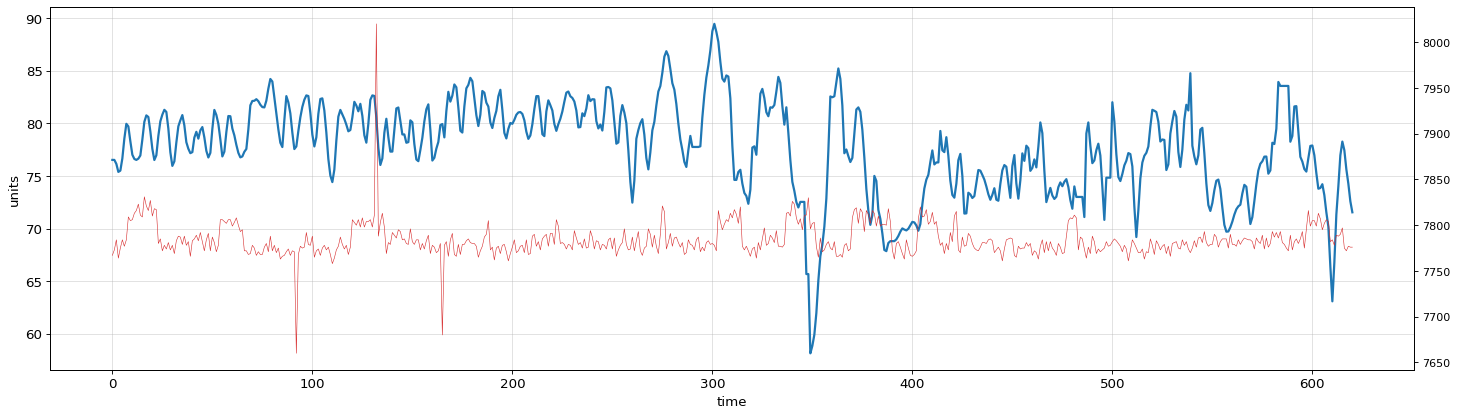

obs / r2  lag= 5
Pearson r= -0.04  p-value= 0.35


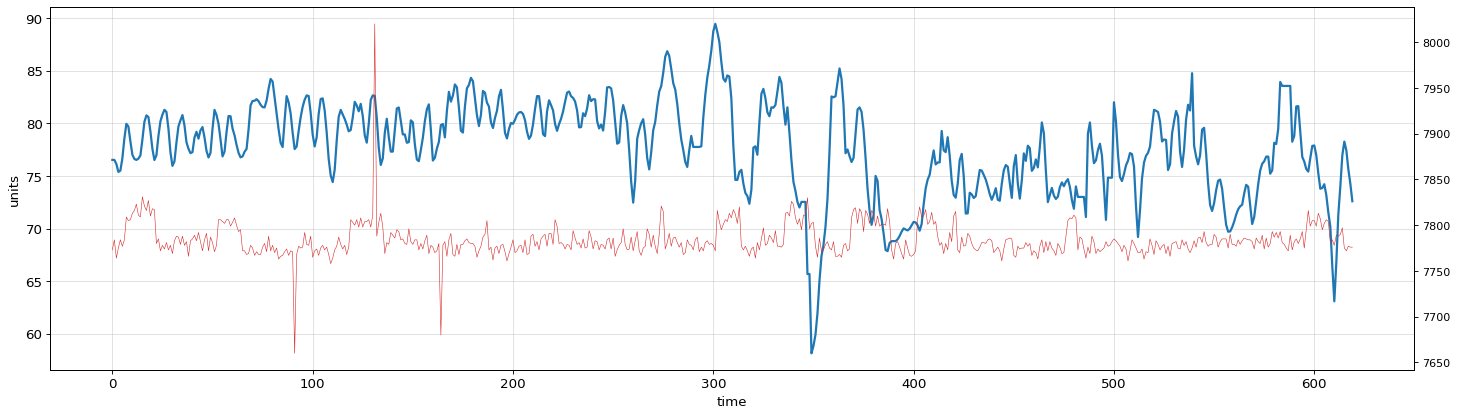

In [4]:
max_lag=5
for c in range(1, ds.shape[1]):
    for lag in range(1, max_lag+1):
        print( ds.columns[0], '/', ds.columns[c], ' lag=', lag)
        ts1 = ds.iloc[:, 0][:-lag]
        ts2 = ds.iloc[:, c].shift(-lag)[:-lag]
        r, p = stats.pearsonr(ts1, ts2)
        print('Pearson r=', round(r,2), ' p-value=', round(p,2))
        tsp.plot_compare(ts1, ts2)    
        plt.show()

### Key preprocess to be applied

* Imputation
* Detrending
* Stationarization
* Outlier filtering

### Extensions

* Apply Pearson/Spearman
* Pre-smoothing (MA)
* Rolling aggregation (mw)
* Correlation on time (mw)